## Projeto de Redes Sociais

In [62]:
import freeman as fm
import seaborn as sns
import statsmodels.api as sm
import networkx as nx
import pylab
from collections import defaultdict



In [63]:
g = fm.load('data/schools.gml')

In [64]:
g.set_all_nodes(size=10, labpos='hover')

# Deixar as arestas semi-transparentes para
# a visualização ficar um pouco mais leve.
# g.set_all_edges(color=(0, 0, 0, 0.25))

# Usar um algoritmo especial para posicionar
# os nós de acordo com grupos.
g.move('kamada_kawai')

g.draw()

In [65]:
schools = defaultdict(list)


# for n in g.nodes:
#     schools['id'].append(n)

for n in g.nodes:
    schools['isatm'].append(float(g.nodes[n]['isatm']))

for n in g.nodes:
    schools['closeness'].append(nx.closeness_centrality(g, n))

print(len(schools['isatm']))

447


<ipython-input-68-4249b97753ef>:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



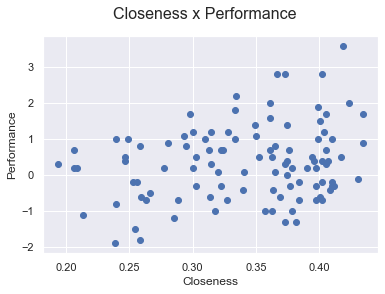

In [68]:
ax = pylab.subplot(111)
ax.scatter(school_closeness, school_scores)
pylab.xlabel('Closeness')
pylab.ylabel('Performance')
pylab.suptitle('Closeness x Performance', fontsize=16)
ax.figure.show()

In [67]:
model = sm.OLS(school_scores, school_closeness)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.121
Method:                 Least Squares   F-statistic:                              15.26
Date:                Wed, 04 Nov 2020   Prob (F-statistic):                    0.000168
Time:                        20:40:41   Log-Likelihood:                         -149.25
No. Observations:                 104   AIC:                                      300.5
Df Residuals:                     103   BIC:                                      303.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1287      0.289      3.907      0.000       0.556       1.702
==============================================================================
Omnibus:                        3.758   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.221
Skew:                           0.419   Prob(JB):                        0.200
Kurtosis:                       3.206   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""